## JRN longterm climate trends

USHCN Stations at Jornada:

JORNADA EXPERIMENTAL RANGE: USH00294426  


In [13]:
# Importing part of our climate tools module
# If you don't have it see here: https://github.com/gremau/climtools
import climtools.get_ushcn as ushcn

# Import standard python modules for data and file handling
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Path to our USHCN data store we downloaded
# Later versions of the data have had issues...
ushcn_path = '/home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn.v2.5.5.20220609'

In [2]:
# Get the inventory file for USHCN stations
inventory = ushcn.get_stationsfile(os.path.dirname(ushcn_path))
inventory.head()

Retrieving /home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn-v2.5-stations.txt


,id,lat,lon,elev,state,name,comp1,comp2,comp3,utcoffset
0,USH00011084,31.0581,-87.0547,25.9,AL,BREWTON 3 SSE,------,------,------,6
1,USH00012813,30.5467,-87.8808,7.0,AL,FAIRHOPE 2 NE,------,------,------,6
2,USH00013160,32.8347,-88.1342,38.1,AL,GAINESVILLE LOCK,011694,------,------,6
3,USH00013511,32.7017,-87.5808,67.1,AL,GREENSBORO,------,------,------,6
4,USH00013816,31.8700,-86.2542,132.0,AL,HIGHLAND HOME,------,------,------,6


In [3]:
search = inventory[inventory['name'].str.contains(
    'JORNADA')]
print(search)
studystn = search.id.values.tolist()
studystnnames = search.name.values.tolist()
studystnlat = search.lat.values.tolist()

              id      lat       lon    elev state               name   comp1  \
661  USH00294426  32.6169 -106.7411  1300.3    NM  JORNADA EXP RANGE  ------   

      comp2   comp3  utcoffset  
661  ------  ------          7  


In [4]:
# See functions, this will fetch precip and avg T, subset to site
# drop flags, and convert to correct units
tavg = ushcn.get_monthly_var('tavg', stationids=studystn, dpath=ushcn_path)
prcp = ushcn.get_monthly_var('prcp', stationids=studystn, dpath=ushcn_path)
# Then subset to years before 2022
tavg = tavg.loc[tavg.year < 2022,:]
prcp = prcp.loc[prcp.year < 2022,:]

Opening /home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn.v2.5.5.20220609/USH00294426.FLs.52j.tavg
Opening /home/greg/data/rawdata/NCDC/ushcn_v2.5/ushcn.v2.5.5.20220609/USH00294426.FLs.52j.prcp


In [5]:
tavg['station_name'] = ''
tavg['latitude'] = np.nan
prcp['station_name'] = ''
prcp['latitude'] = np.nan
for i in range(0, 1):
    print(str(i) + ' ' + studystn[i] + ' ' + studystnnames[i] + ' ' + str(studystnlat[i]))
    tavg.loc[tavg.stationid==studystn[i], 'station_name'] = studystnnames[i]
    tavg.loc[tavg.stationid==studystn[i], 'latitude'] = studystnlat[i]
    prcp.loc[prcp.stationid==studystn[i], 'station_name'] = studystnnames[i]
    prcp.loc[prcp.stationid==studystn[i], 'latitude'] = studystnlat[i]
    
out = pd.concat([tavg, prcp])

0 USH00294426 JORNADA EXP RANGE 32.6169


In [6]:
out.to_csv('../data/Jornada_USHCN_monthlyclimate.csv', index=False)
out.tail()

,stationid,date,year,month,day,variable,value,station_name,latitude
1046,USH00294426,2021-08-31,2021,aug,31,prcp,29.0,JORNADA EXP RANGE,32.6169
1177,USH00294426,2021-09-30,2021,sep,30,prcp,26.2,JORNADA EXP RANGE,32.6169
1308,USH00294426,2021-10-31,2021,oct,31,prcp,2.0,JORNADA EXP RANGE,32.6169
1439,USH00294426,2021-11-30,2021,nov,30,prcp,10.2,JORNADA EXP RANGE,32.6169
1570,USH00294426,2021-12-31,2021,dec,31,prcp,0.0,JORNADA EXP RANGE,32.6169


In [7]:
gby = tavg.loc[tavg.date > '1910-01-01',:].groupby(['station_name','latitude','year'])
annmean = gby.agg({'value': 'mean'}).reset_index()
annmean['variable'] = 'tavg'
gby = prcp.loc[prcp.date > '1910-01-01',:].groupby(['station_name','latitude','year'])
annsum = gby.agg({'value': 'mean'}).reset_index()
annsum['variable'] = 'prcp'
annmean = pd.concat([annmean, annsum])

annmean.tail()

,station_name,latitude,year,value,variable
107,JORNADA EXP RANGE,32.6169,2017,23.458333,prcp
108,JORNADA EXP RANGE,32.6169,2018,23.766667,prcp
109,JORNADA EXP RANGE,32.6169,2019,23.091667,prcp
110,JORNADA EXP RANGE,32.6169,2020,17.241667,prcp
111,JORNADA EXP RANGE,32.6169,2021,16.383333,prcp


In [8]:
import seaborn as sns
sns.set(rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'white'})
#sns.set_palette('colorblind')

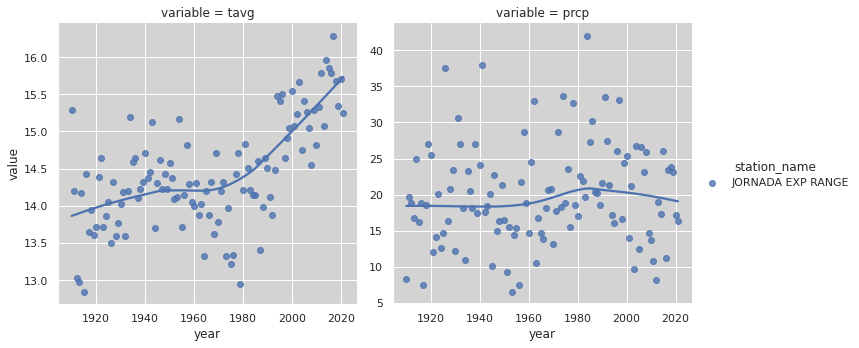

In [9]:
g = sns.lmplot(x='year', y='value', hue='station_name', col='variable',
lowess=True, data=annmean, facet_kws={'sharey':False})

In [10]:
annmean[annmean.variable=='prcp']

,station_name,latitude,year,value,variable
0,JORNADA EXP RANGE,32.6169,1910,8.283333,prcp
1,JORNADA EXP RANGE,32.6169,1911,19.608333,prcp
2,JORNADA EXP RANGE,32.6169,1912,18.891667,prcp
3,JORNADA EXP RANGE,32.6169,1913,16.816667,prcp
4,JORNADA EXP RANGE,32.6169,1914,24.933333,prcp
...,...,...,...,...,...
107,JORNADA EXP RANGE,32.6169,2017,23.458333,prcp
108,JORNADA EXP RANGE,32.6169,2018,23.766667,prcp
109,JORNADA EXP RANGE,32.6169,2019,23.091667,prcp
110,JORNADA EXP RANGE,32.6169,2020,17.241667,prcp


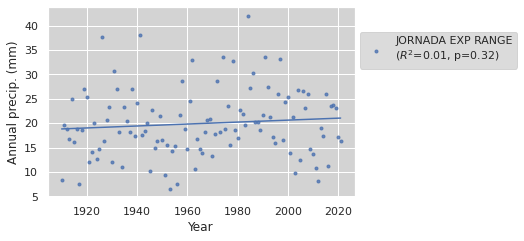

In [14]:
ann_piv = annmean[annmean.variable=='prcp'].pivot(index='year', columns='station_name', values='value')
ann_piv['date'] = pd.to_datetime(ann_piv.index.astype(str) + '-12-31', format='%Y-%m-%d')
ann_piv.index
from scipy import stats

fig, axes = plt.subplots(1,1, figsize=[5.5,3.5])

#sns.set_palette('magma')
slope, intercept, rv, pv, se = stats.linregress(ann_piv.index,ann_piv['JORNADA EXP RANGE'])
sns.regplot(ax=axes, x=ann_piv.index, y='JORNADA EXP RANGE', ci=False,
            data=ann_piv, label="JORNADA EXP RANGE\n($R^2$={0:.2f}, p={1:.2f})".format(rv**2, pv),
            marker='.', line_kws={'lw':'1.5','zorder':11},
            scatter_kws={'zorder':10})

axes.legend(bbox_to_anchor=(1,.9),loc="upper left")
#axes[0].set_xlim([1960, 2020])
axes.set_ylabel('Annual precip. (mm)')
axes.set_xlabel('Year')

fig.savefig('../fig/Jornada_ltprecip.png',dpi=500,bbox_inches='tight', facecolor='white')

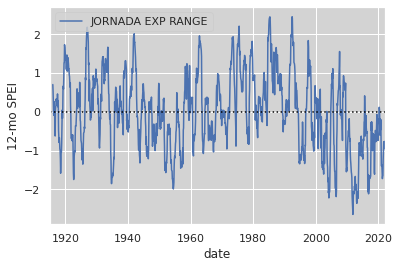

In [15]:
spei = pd.read_csv('../data/Jornada_USHCN_12moSPEI.csv')
spei.index = pd.to_datetime(spei.date)
g = sns.lineplot(x=spei.index, y='value', estimator=None, hue='station_name', data=spei)
plt.hlines(y=0, xmin=spei.index.min(), xmax=spei.index.max(), color='black', ls=':')
plt.legend(loc='upper left')
plt.xlim([spei.index.min(), spei.index.max()])
plt.ylabel('12-mo SPEI')
plt.savefig('../fig/Jornada_ltSPEI.png',dpi=200,bbox_inches='tight', facecolor='white')

## TEST GHCN data

In [16]:
# Import GHCN tools and get station file
import climtools.get_ghcn as ghcn
ghcnd_inv = ghcn.get_stationsfile()

In [17]:
search = ghcnd_inv[ghcnd_inv['name'].str.contains('JORNADA')]
print(search)
studystn = search.id.values.tolist()
studystnnames = search.name.values.tolist()
studystnlat = search.lat.values.tolist()

                 id      lat       lon    elev state               name  \
103786  USC00294426  32.6161 -106.7403  1316.1    NM  JORNADA EXP RANGE   

       gsn_flag  hcn_crn_flag  wmo_id  
103786      NaN           NaN     NaN  


In [18]:
# This would get GHCN daily data, can ignore for now
jer_ghcnd = ghcn.get_dailysummary(studystn[i],startdt='1914-12-31',enddt='2021-12-31')
jer_ghcnd.index = pd.to_datetime(jer_ghcnd.DATE)
jer_ghcnd['year'] = jer_ghcnd.index.year
jer_ghcnd['month'] = jer_ghcnd.index.month
jer_ghcnd.head()


,STATION,DATE,PRCP,TAVG,TMAX,TMIN,year,month
DATE,,,,,,,,
1914-12-31,USC00294426,1914-12-31,0.0,NaN,12.2,-7.8,1914,12
1915-01-01,USC00294426,1915-01-01,NaN,NaN,14.4,-8.9,1915,1
1915-01-02,USC00294426,1915-01-02,NaN,NaN,13.3,-3.9,1915,1
1915-01-03,USC00294426,1915-01-03,NaN,NaN,14.4,-5.0,1915,1
1915-01-04,USC00294426,1915-01-04,NaN,NaN,12.2,0.6,1915,1


In [19]:
ann = ghcn.get_annualsummary(studystn[i],startdt='1914-12-31',enddt='2021-12-31')
ann.tail()

,STATION,DATE,PRCP,TAVG,TMAX,TMIN
94,USC00294426,2017,341.4,NaN,NaN,NaN
95,USC00294426,2018,285.2,NaN,NaN,NaN
96,USC00294426,2019,277.1,NaN,NaN,NaN
97,USC00294426,2020,206.9,NaN,NaN,NaN
98,USC00294426,2021,196.6,NaN,NaN,NaN


In [20]:
ann = ann.melt(id_vars=['STATION','DATE'],value_vars=['PRCP','TAVG'])

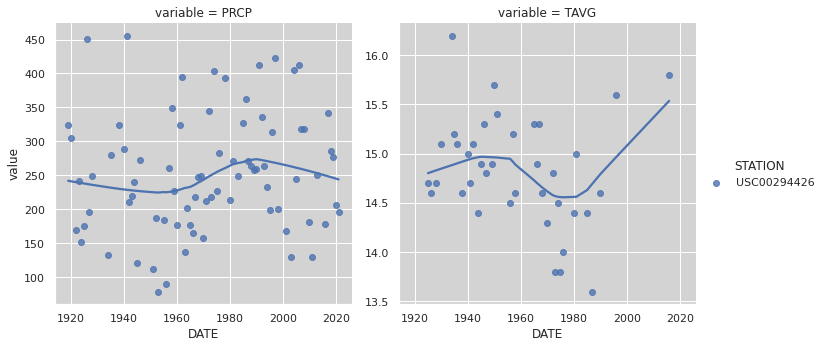

In [21]:
g = sns.lmplot(x='DATE', y='value', hue='STATION', col='variable',
lowess=True, data=ann, facet_kws={'sharey':False})

There might be some temperature gapfilling going on for USHCN, but not sure yet.